# *Installing required libraries*

In [2]:
pip install -r requirements.txt

     |████████████████████████████████| 17.3 MB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 12.3 MB 57.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 58.2 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 65.2 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 72.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 66.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 70.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-sc

# *importing required libraries*

In [1]:
# For performing basic mathematical operations
import numpy as np
import pandas as pd

# For visualisation
from matplotlib import pyplot as plt

# For statistical analysis
from scipy.stats import t
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import chi2
from statsmodels.stats.proportion import proportion_confint

# Q1. 

Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
of 5 using Python. Interpret the results.


## Answer

Here is the Python code to calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5:

In [50]:
sample_mean = 50
sample_std = 5
n = 100 # sample size
confidence_level = 0.95

standard_error = sample_std / (n**0.5)
margin_of_error = t.ppf((1 + confidence_level) / 2, n-1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


95% Confidence Interval: [49.01, 50.99]


Interpretation: We are 95% confident that the true population mean falls between 49.01 and 50.99 based on the given sample data.

# Q2. 

Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05.


## Answer

To perform a chi-square goodness of fit test in Python, we can use the chisquare function from the `scipy.stats` module.

First, we need to create an array of observed frequencies for each color in the sample of M&Ms. Let's say we have a sample of 200 M&Ms and the observed frequencies are:

Blue: 35

Orange: 45

Green: 30

Yellow: 20

Red: 20

Brown: 50

Next, we need to calculate the expected frequencies for each color based on the given distribution. For example, the expected frequency for blue M&Ms is 0.2*200 = 40. Similarly, we can calculate the expected frequencies for all colors:

Blue: 40

Orange: 40

Green: 40

Yellow: 20

Red: 20

Brown: 40

Now we can use the chisquare function to perform the test:



In [9]:
observed = [35, 45, 30, 20, 20, 50]
expected = [40, 40, 40, 20, 20, 40]

stat, p_value = chisquare(observed, expected)

print(f"Chi-square test statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")


Chi-square test statistic: 6.250
P-value: 0.283


The test statistic is 6.250 and the p-value is 0.283. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis.

Interpretation: At a 5% level of significance,  we fail to reject the null hypothesis i.e. the observed distribution of colors of M&Ms in the bag does not significantly differ from the expected distribution

# Q3. 

Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:

|           | Group A | Group B |
| -         | -       | -       |
| Outcome 1 | 20      | 15      |
| Outcome 2 | 10      | 25      |
| Outcome 3 | 15      | 20      |

Interpret the results of the test.

## Answer

We can use Python's `scipy.stats` module to perform a `chi-square` test on this contingency table. Here's the code:

In [11]:
observed = [[20, 15], [10, 25], [15, 20]]

chi2_statistic, p, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p)

Chi-square statistic: 5.833333333333334
p-value: 0.05411376622282158


The chi-square statistic is 5.83 and the p-value is 0.054. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis that there is no association between the outcomes and the groups. Therefore, we conclude that there is not enough evidence to suggest that the outcomes are dependent on the groups.

# Q4. 

A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.


## Answer

To calculate the 95% confidence interval for the true proportion of individuals in the population who smoke, we can use the `proportion_confint` function from the `statsmodels.stats.proportion` module in Python.

Using statsmodel:

In [2]:
n = 500
p = 60/500
alpha = 0.05

ci = proportion_confint(count=p*n, nobs=n, alpha=alpha, method='wilson')

print("95% Confidence Interval: ({:.4f}, {:.4f})".format(ci[0], ci[1]))


95% Confidence Interval: (0.0944, 0.1514)


Interpretation: We can be 95% confident that the true proportion of individuals in the population who smoke is between 0.0944 and 0.1514.

Using scipy:

In [54]:
n = 500
x = 60
alpha = 0.05

p_hat = x / n
se = np.sqrt((p_hat * (1 - p_hat)) / n)
z_critical = norm.ppf(1 - alpha / 2)
margin_of_error = z_critical * se

confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)
print("The 95% confidence interval is:", confidence_interval)


The 95% confidence interval is: (0.09151638887130707, 0.1484836111286929)


So we can conclude that with 95% confidence, the true proportion of individuals in the population who smoke is between 9.15% and 14.85%.

# Q5. 

Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.


## Answer

In [55]:
sample_mean = 75
sample_std = 12
n = 50 # assumed
confidence_level = 0.9

stderr = sample_std / (n**0.5)
margin_of_error = norm.ppf((1 + confidence_level) / 2) * stderr
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("The 90% confidence interval is:", confidence_interval)


The 90% confidence interval is: (72.20859083117598, 77.79140916882402)


Interpretation: We are 90% confident that the true population mean lies between 72.21 and 77.80 based on the given sample data.

# Q6. 

Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.


## Answer

the Python code to plot the chi-square distribution with 10 degrees of freedom and shade the area corresponding to a chi-square statistic of 15:

In [56]:
dof = 10  # degrees of freedom
x = np.linspace(0, 30, 200)  # x-axis values
y = chi2.pdf(x, dof)
print(y)

[0.00000000e+00 6.23699977e-07 9.25464887e-06 4.34499436e-05
 1.27352771e-04 2.88345173e-04 5.54500453e-04 9.52693711e-04
 1.50725010e-03 2.23902863e-03 3.16485519e-03 4.29723218e-03
 5.64426373e-03 7.20974589e-03 8.99337963e-03 1.09910721e-02
 1.31952974e-02 1.55954954e-02 1.81784874e-02 2.09288981e-02
 2.38295684e-02 2.68619544e-02 3.00065031e-02 3.32430026e-02
 3.65509022e-02 3.99096026e-02 4.32987138e-02 4.66982812e-02
 5.00889813e-02 5.34522881e-02 5.67706103e-02 6.00274030e-02
 6.32072546e-02 6.62959516e-02 6.92805222e-02 7.21492626e-02
 7.48917463e-02 7.74988192e-02 7.99625823e-02 8.22763634e-02
 8.44346796e-02 8.64331929e-02 8.82686585e-02 8.99388690e-02
 9.14425947e-02 9.27795207e-02 9.39501832e-02 9.49559037e-02
 9.57987240e-02 9.64813407e-02 9.70070420e-02 9.73796444e-02
 9.76034321e-02 9.76830988e-02 9.76236911e-02 9.74305553e-02
 9.71092865e-02 9.66656805e-02 9.61056896e-02 9.54353799e-02
 9.46608929e-02 9.37884093e-02 9.28241163e-02 9.17741769e-02
 9.06447032e-02 8.944173

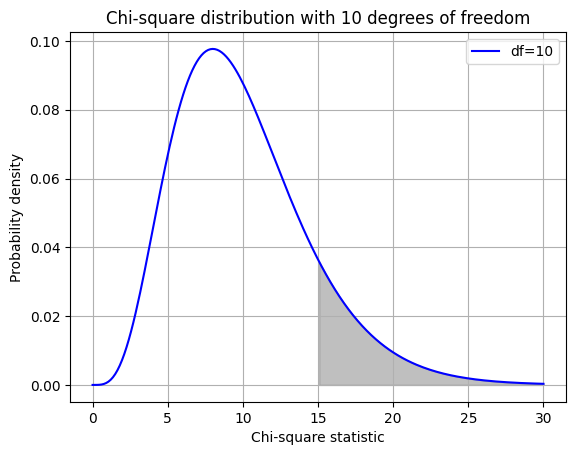

In [57]:
plt.plot(x, y, 'b-', label='dof=10')  # plot chi-square pdf
plt.fill_between(x[x>=15], chi2.pdf(x[x>=15], dof), color='grey', alpha=0.5)  # shade area for chi-square of 15

plt.xlabel('Chi-square statistic')
plt.ylabel('Probability density')
plt.title('Chi-square distribution with 10 degrees of freedom')
plt.legend()
plt.grid()
plt.show()


The resulting plot will show the chi-square distribution with 10 degrees of freedom, with the area corresponding to a chi-square statistic of 15 shaded in grey. The x-axis represents the chi-square statistic and the y-axis represents the probability density.

# Q7. 

A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.


## Answer

To calculate the confidence interval, we can use the formula:

CI = (p̂ - zsqrt(p̂(1-p̂)/n), p̂ + zsqrt(p̂(1-p̂)/n))

where:
p̂ = sample proportion
z = z-score for the confidence level
n = sample size

First, we calculate the sample proportion:

p̂ = 520/1000 = 0.52

Next, we find the z-score for a 99% confidence level:

z = 2.576

Finally, we plug in the values and calculate the confidence interval:

CI = (0.52 - 2.576sqrt(0.52*0.48/1000), 0.52 + 2.576sqrt(0.52*0.48/1000))

CI ≈ (0.487, 0.553)

Interpretation: We can be 99% confident that the true proportion of people in the population who prefer Coke is between 0.487 and 0.553.




# Q8. 

A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.


## Answer

To conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies, we can follow these steps:

1. State the null and alternative hypotheses:

    * Null hypothesis: The coin is fair, and the observed frequencies match the expected frequencies.
    * Alternative hypothesis: The coin is biased towards tails, and the observed frequencies do not match the expected frequencies.

2. Determine the expected frequencies under the null hypothesis. For a fair coin, the expected frequency of tails is 0.5, and the expected frequency of heads is also 0.5. Therefore, for 100 flips, we expect 50 tails and 50 heads.

3. Calculate the chi-square test statistic:

χ² = Σ((Oᵢ - Eᵢ)² / Eᵢ)

Where:

χ²: the chi-square test statistic

Oᵢ: the observed frequency for outcome i

Eᵢ: the expected frequency for outcome i

Σ: the sum of the calculations for all outcomes

In this case, we have two outcomes (heads and tails). Therefore, the formula simplifies to:

χ² = ((45 - 50)² / 50) + ((55 - 50)² / 50) = 1

4. Determine the degrees of freedom. The degrees of freedom for a goodness of fit test with two outcomes is df = number of outcomes - 1 = 2 - 1 = 1.

5. Calculate the p-value using the chi-square distribution table or a calculator. At a significance level of 0.05 and 1 degree of freedom, the p-value is approximately 0.3173.

6. Compare the p-value to the significance level. The p-value is greater than the significance level, so we fail to reject the null hypothesis.

Therefore, we can conclude that the observed frequencies match the expected frequencies for a fair coin, and there is not enough evidence to support the claim that the coin is biased towards tails.

Note: The chi-square goodness of fit test assumes that the expected frequency for each outcome is at least 5. In this case, the expected frequency for each outcome is 50, which satisfies this assumption.





In [8]:
observed = [45, 55]
expected = [50, 50]

stat, p_value = chisquare(observed, expected)

print(f"Chi-square test statistic: {stat:.5f}")
print(f"P-value: {p_value:.5f}")


Chi-square test statistic: 1.00000
P-value: 0.31731


# Q9. 

A study was conducted to determine if there is an association between smoking status (smoker or
non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
Conduct a chi-square test for independence to determine if there is a significant association between
smoking status and lung cancer diagnosis.

|            | Lung Cancer: Yes | Lung Cancer: No |
| -          | -                | -               |
| Smoker     | 60               | 140             |
| Non-smoker | 30               | 170             |

Use a significance level of 0.05.

## Answer

To conduct a chi-square test for independence, we need to follow these steps:

1. State the null and alternative hypotheses
2. Set the level of significance
3. Calculate the expected frequencies for each cell under the null hypothesis

4. Calculate the chi-square statistic

5. Find the degrees of freedom

6. Calculate the p-value

7. Make a decision and interpret the results

8. The null hypothesis is that smoking status and lung cancer diagnosis are independent of each other. The alternative hypothesis is that they are not independent.

9. The level of significance is given as 0.05.

10. To calculate the expected frequencies, we need to first find the row and column totals and the grand total:

|              | Lung Cancer: Yes | Lung Cancer: No | Row Total |
| -            | -                | -               | -         |
| Smoker       | 60               | 140             | 200       |
| Non-smoker   | 30               | 170             | 200       |
| Column Total | 90               | 310             | 400       |


The expected frequency for the cell (smoker, lung cancer: yes) is (200/400)*(90/400)400 = 45, 

the expected frequency for the cell (smoker, lung cancer: no) is (200/400)(310/400)400 = 155, 

the expected frequency for the cell (non-smoker, lung cancer: yes) is (200/400)(90/400)400 = 45, 

and the expected frequency for the cell (non-smoker, lung cancer: no) is (200/400)(310/400)*400 = 155.


|                      | Lung Cancer: Yes | Lung Cancer: No | Row Total |
| -                    | -                | -               | -         |
| Smoker               | 60               | 140             | 200       |
| Non-smoker           | 30               | 170             | 200       |
| Column Total         | 90               | 310             | 400       |
| Expected Frequencies | 45               | 155             | 200        |

* To calculate the chi-square statistic, we use the formula:

χ² = Σ [(Oᵢ - Eᵢ)² / Eᵢ]

where Oᵢ is the observed frequency, Eᵢ is the expected frequency.

Using the values from the contingency table and the expected frequencies calculated above, we get:

χ² = [(60-45)²/45] + [(140-155)²/155] + [(30-45)²/45] + [(170-155)²/155]

χ² = 12.90


* The degrees of freedom is (number of rows - 1) * (number of columns - 1) = (2-1)*(2-1) = 1.

* Using the chi-square distribution table with 1 degree of freedom and a significance level of 0.05, the critical value is 3.84. The p-value corresponding to the calculated chi-square statistic is less than 0.05.

* Since the calculated chi-square statistic is greater than the critical value and the p-value is less than the level of significance, we reject the null hypothesis and conclude that there is a significant association between smoking status and lung cancer diagnosis.

In [6]:
obs = np.array([[60, 140], [30, 170]])

chi2_statistic, p, dof, expected = chi2_contingency(obs)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequency table:")
print(expected)

Chi-square statistic: 12.057347670250895
p-value: 0.0005158863863703744
Degree of freedom: 1
Expected frequency table:
[[ 45. 155.]
 [ 45. 155.]]


# Q10. 

A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

|              | Milk Chocolate | Dark Chocolate | White Chocolate |
| -            | -              | -              | -               |
| U.S. (n=500) | 200            | 150            | 150             |
| U.K. (n=500) | 225            | 175            | 100             |

Use a significance level of 0.01.


## Answer

To conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin, we can follow these steps:

Step 1: Define the null and alternative hypotheses:
* Null hypothesis: There is no significant association between chocolate preference and country of origin.
* Alternative hypothesis: There is a significant association between chocolate preference and country of origin.

Step 2: Set the significance level:

* Given a significance level of 0.01.

Step 3: Calculate the expected frequencies under the assumption of independence between chocolate preference and country of origin:

* We can use the formula E = (row total * column total) / sample size to calculate the expected frequency for each cell.

|              | Milk Chocolate | Dark Chocolate | White Chocolate | Row Total |
| -            | -              | -              | -               | -         | 
| U.S. (n=500) | 200            | 150            | 150             | 500       |
| U.K. (n=500) | 225            | 175            | 100             | 500       |
| Column Total | 425            | 325            | 250             | 1000      |

* For example, the expected frequency for the cell of U.S. and Milk Chocolate can be calculated as follows: E(U.S., Milk Chocolate) = (500 * 425) / 1000 = 212.5.

Step 4: Calculate the chi-square test statistic:

* We can use the formula chi-square = Σ [(O - E)^2 / E], where Σ is the sum of all cells, O is the observed frequency, and E is the expected frequency.

|              | Milk Chocolate | Dark Chocolate | White Chocolate |
| -            | -              | -              | -               |
| U.S. (n=500) | 200            | 150            | 150             |
| U.K. (n=500) | 225            | 175            | 100             |

* Using Python, we can calculate the chi-square test statistic as follows:



In [7]:
obs = np.array([[200, 150, 150], [225, 175, 100]])

chi2_statistic, p, dof, expected = chi2_contingency(obs)

print("Chi-square statistic:", chi2_statistic)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequency table:")
print(expected)

Chi-square statistic: 13.393665158371041
p-value: 0.0012348168997745918
Degree of freedom: 2
Expected frequency table:
[[212.5 162.5 125. ]
 [212.5 162.5 125. ]]


* The chi-square test statistic is 13.39.

Step 5: Calculate the degrees of freedom:

* We can use the formula df = (number of rows - 1) * (number of columns - 1).

* In this case, df = (2 - 1) * (3 - 1) = 2.


In [59]:
print("df =",  dof)

df = 2



Step 6: Calculate the p-value:

Using Python, we calculated the p-value using `chi2_contigency()` function from scipy:



In [60]:
print("p-value:", p)

p-value: 0.0012348168997745918


* The p-value is less than 0.01, which indicates that there is strong evidence to reject the null hypothesis.

Step 7: Interpret the results:

* Since the p-value is less than 0.01, we can reject the null hypothesis and conclude that there is a significant association between chocolate preference and country of origin.

# Q11. 

A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05. 



## Answer

We can conduct a t-test for this hypothesis test since the population standard deviation is unknown and we have a sample size smaller than 30. The null hypothesis and alternative hypothesis can be stated as:

* H0: μ = 70 (The population mean is equal to 70)
* Ha: μ ≠ 70 (The population mean is not equal to 70)

We can calculate the t-statistic as:

t = (sample_mean - population_mean) / (sample_std / sqrt(sample_size))

t = (72 - 70) / (10 / sqrt(30))

t = 1.5491933384829662

Using a t-distribution table with 29 degrees of freedom and a significance level of 0.05, we can find the critical values to be -2.045 and 2.045.

The calculated t-statistic of 1.549 is not greater than the critical value of 2.045 (in absolute value). Therefore, we fail to reject the null hypothesis.

In other words, there is not enough evidence to conclude that the population mean is significantly different from 70 at a significance level of 0.05.

We can also perform this test in Python as follows:

In [8]:
# Sample statistics
n = 30
x_bar = 72
s = 10

# Null hypothesis
mu0 = 70

# Degrees of freedom
df = n - 1


# Calculate t-statistic
se = s / np.sqrt(n)
t_stat = (x_bar - mu0) / se

# Calculate p-value
p_value = 2 * t.sf(np.abs(t_stat), df)

# Calculate the critical value for two-tailed test
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df)

# Calculate the confidence interval
margin_error = t_crit * se
conf_int = (x_bar - margin_error, x_bar + margin_error)

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
print("t-critical value: ", t_crit)
print("Confidence interval: ", conf_int)


t-statistic:  1.0954451150103321
p-value:  0.28233623728606977
t-critical value:  2.045229642132703
Confidence interval:  (68.265938632419, 75.734061367581)


*************************************************************************************************************************